In [1]:
import os 
#data_location = input("Enter Path Location of data")
os.chdir("/home/mitchell/Documents/masters/masters/scripts/")
import galaxy_pairs
import cmb
os.chdir("/home/mitchell/Documents/masters/masters/data")
cwd = os.getcwd()
print(cwd)

pywtl packages could not be imported.  This may break plotting code.
FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)
/home/mitchell/Documents/masters/masters/data


In [2]:
import numpy as np
import scipy as sp
import astropy as ap
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
import scipy.constants as const
from astropy import constants as ap_const
import scipy.ndimage 
import PIL
import sptpol_software as sps
from astropy.io import fits
from astropy.cosmology import Planck15
from astropy import units as u
import scipy.spatial.distance as dist
print(Planck15)
cosmo= Planck15

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)


In [3]:
from sptpol_software.util.tools import stat
from sptpol_software.observation import *
import sptpol_software.observation as obs
import sptpol_software as sps
import sptpol_software.observation.sky
from sptpol_software.util import files

In [4]:
T_cmb = 2.725
freqs_ghz = [93.2000,147.700]
beam_norm_correction = [1./0.99673, 1./0.99470, 1./1. ] 
cal_factors = [0.9097,0.7765] # no 220 is why last is zero. 
#pol_cal_factors = pol_cal_factors_800 * beam_norm_correction

In [5]:
glob.glob('*.h5')

['ra0hdec-57.5_ra0hdec-57p5_20140706_073929_090ghz.h5',
 'ra0dec-57p5_sum1000_090ghz.h5',
 'ra0dec-57p5_sum5000_150ghz.h5',
 'y_map.h5',
 'ra0hdec-57.5_ra0hdec-57p5_20140706_073929_150ghz.h5',
 'ra0dec-57p5_sum100Weighted_150ghz.h5',
 'ra0dec-57p5_sum1000_150ghz.h5',
 'ra0dec-57p5_sum_150ghz.h5',
 'ra0dec-57p5_sum100Weighted_090ghz.h5',
 'first_coadd_test_fbcode.h5',
 'test.h5',
 'ra0dec-57p5_sum5000_090ghz.h5',
 'ra0dec-57p5_sum_090ghz.h5']

In [6]:
map_150ghz = files.read("ra0dec-57p5_sum5000_150ghz.h5")
map_90ghz = files.read("ra0dec-57p5_sum5000_090ghz.h5")

In [7]:
# map_150ghz = pol_cal_factors_800[0]*map_150ghz
# map_90ghz = pol_cal_factors_800[1]*map_90ghz

In [8]:
# map_150ghz.getSubmap([5,5], center_offset=[0,0], units='degree').drawImage(bw=False,vmax=0)
# map_90ghz.getSubmap([10,10], center_offset=[0,0], units='degree').drawImage(bw=False)

In [9]:
# diff_T = map_150ghz-map_90ghz
# diff_T.getSubmap([5,5], center_offset=[1,1], units='degree').drawImage(bw=False)

In [10]:
# def convert_ghz_to_y(freq_power):
#     x = freq_power/56.85  # x = h v / k_B T_CMB
#     return((x/np.tanh(x/2)) - 4)
print(cmb.convert_ghz_to_y(90))
print(cmb.convert_ghz_to_y(150))

-1.598760150351676
-0.9553171397183053


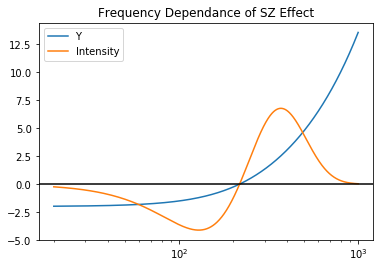

In [11]:
freq_range = np.arange(20,1000,1)
x = freq_range/56.85
y_param = [(ex/np.tanh(ex/2) - 4) for ex in x]
plt.semilogx(freq_range,y_param,label='Y')
I_v = [(ex**4 * np.exp(ex))/(np.exp(ex)-1)**2 * (ex/np.tanh(ex/2) - 4) for ex in x]
plt.semilogx(freq_range,I_v,label='Intensity')
plt.axhline(0, color='black')
plt.title('Frequency Dependance of SZ Effect')
plt.legend()

In [12]:
# map_150ghz_array = map_150ghz.getTOnly().map
# print(type(map_150ghz))

In [13]:
# freq_scaling = convert_ghz_to_y(150)-convert_ghz_to_y(90)
# print(freq_scaling)
# freq_scaling_fac = 1.0/freq_scaling
# print(freq_scaling_fac)

In [14]:
#y_map = sptpol_software.observation.sky.Map
# y_map = freq_scaling_fac*(map_150ghz-map_90ghz)
#/(convert_ghz_to_y(150)-convert_ghz_to_y(90))

In [11]:
# y_map.getSubmap([5,5], center_offset=[0,0], units='degree').drawImage(bw=True)
# print("Functionally a factor of 2 conversion, look at scale")
# diff_T.getSubmap([2,2], center_offset=[0,0], units='degree').drawImage(bw=False)
y_map_array = cmb.get_y_map([map_150ghz,map_90ghz],cal_factors,freqs_ghz)


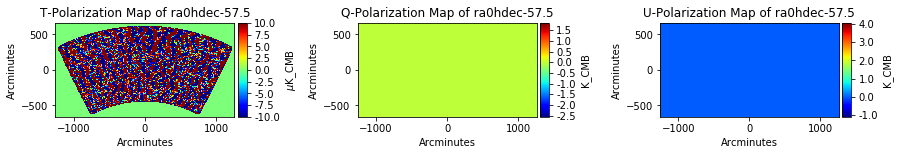

<Figure size 432x288 with 0 Axes>

In [15]:
y_map.drawImage(bw=False,vmax=-0.00001,vmin=0.00001)

In [122]:
np.shape(y_map)

array([1320, 2520])

In [154]:
# y_map.writeToHDF5('y_map.h5',overwrite=True,use_compression=False)
y_map_array = y_map.getTOnly().map
print(y_map_array)
np.save('y_map', y_map_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


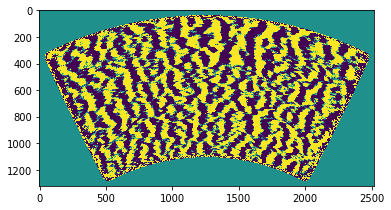

In [12]:
plt.imshow(y_map_array,vmax=0.00001,vmin=-0.00001)

In [17]:
# red_mapper_cat = fits.open("DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits")
from astropy.table import Table
dat = Table.read('DES_Y1A1_3x2pt_redMaGiC_zerr_CATALOG.fits', format='fits')
df = dat.to_pandas()

In [18]:
# red_mapper_cat.info()
# df['ZREDMAGIC']

In [19]:
# com_dists = cosmo.comoving_distance(df['ZREDMAGIC']).to_value(u.Mpc)
df['COMOVING'] = pd.Series(cosmo.comoving_distance(df['ZREDMAGIC']).to_value(u.Mpc))
df['COMOVING_E'] = pd.Series(cosmo.comoving_distance(df['ZREDMAGIC_E']).to_value(u.Mpc))

In [20]:
help(galaxy_pairs.getPairs)

Help on function getPairs in module galaxy_pairs:

getPairs(data_frame, max_sep=20, results_loc='PAIRS_sparse_dist.npz', save_frame=False)
    Takes a data frame with RA, DEC, and COMOVING distances, and pairs
    up those vectors with the closest vector under a given maximum separation
    and store the results in an array where:
    results[0] = First Item
    results[1] = Second Item
    results[2] = Distance between First Item and Second Item



In [21]:
# print(df)
pairs = galaxy_pairs.getPairs(df,20)
# First index is first item in pair
# Second index in second item in pair
# Third Index is distance apart from each other


In [22]:
pairs_df = pd.DataFrame(pairs.T,columns = ['First_Loc','Second_Loc','Sep'])

In [23]:
# print(pairs)
pairs_df['First_Loc'] = pairs_df.First_Loc.astype(int)
pairs_df['Second_Loc'] = pairs_df.Second_Loc.astype(int)

In [92]:
pairs_df

,First_Loc,Second_Loc,Sep
0,645602,645787,19.440705
1,651449,652553,12.694922
2,645787,647190,17.268397
3,649428,649606,13.064617
4,649348,649809,19.667827
5,649876,650136,12.081126
6,649876,651213,14.828850
7,649405,649876,8.673922
8,649405,650136,9.708314
9,649809,650136,17.977599


In [83]:
import random
index = random.randint(1,len(df))
pos1 = [df['RA'][pairs_df['First_Loc'][index]],df['DEC'][pairs_df['First_Loc'][index]]]
print(index)
print(pos1)
# pos2 = [df['RA'][pairs_df['Second_Loc'][0]],df['DEC'][pairs_df['Second_Loc'][0]]]
# print(pos2)

325389
[349.672926, -51.955633]


In [84]:
df.loc[index]

ID             3.113879e+09
RA             1.715416e+01
DEC           -4.504954e+01
ZREDMAGIC      5.146874e-01
ZREDMAGIC_E    1.910837e-02
weight         1.021461e+00
COMOVING       1.994706e+03
COMOVING_E     8.419074e+01
x_vec          1.346559e+03
y_vec          4.156494e+02
z_vec         -1.411689e+03
Name: 325389, dtype: float64

In [88]:
# df.loc[pairs_df['Second_Loc'][0]]
def SubtractRaDec(radec_1, radec_2):
#     assert((len(radec_1) == 2)) #,"First enetered RaDec does not have two components")
#     assert((len(radec_2) == 2)) #,"Second enetered RaDec does not have two components")

    ra_1 = radec_1[0]
    dec_1 = radec_1[1]
    ra_2 = radec_2[0]
    dec_2 = radec_2[1]
    
    ra_diff = 180 - abs(abs(ra_1 - ra_2) - 180)
    
    dec_diff = 180 - abs(abs(dec_1 - dec_2) - 180)
    
    return([ra_diff,dec_diff])

In [89]:
# rel_pos_1 = [0-pos1[0],-57.5-pos1[1]]
rel_pos_1 = SubtractRaDec([0,-57.5],pos1)
print(rel_pos_1)
# print(rel_pos_1[0])
# [15.089213,5.669675000000012]

[10.327073999999982, 5.544366999999994]


ValueError: zero-size array to reduction operation minimum which has no identity

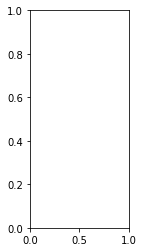

In [82]:
y_map.getSubmap([1,1], center_offset=[rel_pos_1[0],rel_pos_1[1]], units='degree').drawImage(bw=False)

In [22]:
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return np.sqrt(distance)
    

In [71]:
print(np.max(df['RA']))
print(np.min(df['RA']))
print(np.max(df['DEC']))
print(np.min(df['DEC']))


359.999761
0.00065
-38.19687
-60.008339


In [31]:
np.savetxt('pairs.csv',pairs.T,delimiter=',')

In [29]:
vec1 = galaxy_pairs.get_vec_distances(df['RA'][int(pairs[0][0])],df['DEC'][int(pairs[0][0])],df['COMOVING'][int(pairs[0][0])])
vec2 = galaxy_pairs.get_vec_distances(df['RA'][int(pairs[1][0])],df['DEC'][int(pairs[1][0])],df['COMOVING'][int(pairs[1][0])])
print(euclideanDistance(vec1,vec2,3))

19.440705076443454


In [25]:
df.to_csv('DES_REDMAGIC_Manipulated.csv')

In [26]:
# vec_unit_test = RaDec2XYZ(df['RA'],df['DEC'])
# print(vec_unit_test)
# print(np.shape(vec_unit_test))
# vec_unit_test2 = vec_unit_test[0]
# print(vec_unit_test2)

NameError: name 'RaDec2XYZ' is not defined

In [120]:
help(sptpol_software.observation.sky.ang2Pix)

Help on function ang2Pix in module sptpol_software.observation.sky:

ang2Pix(ra_dec, ra_dec_center, reso_arcmin, map_pixel_shape, proj=0, round=True, bin_center_zero=True, return_validity=True, use_c_code=False)
    Supported projections are:
    
     0:  Sanson-Flamsteed projection (x = ra*cos(dec), y = dec)
     1:  CAR projection (x = ra, y = dec)
     2:  SIN projection
     3:  Healpix (not a projection at all, but pixels on the sphere) [NOT IMPLEMENTED]
     4:  stereographic projection
     5:  Oblique Lambert azimuthal equal-area projection (ref p. 185, Snyder, J. P. 1987, Map Projections-A Working Manual (Washington, DC: U.S. Geological Survey))
     7:  CAR projection, with map rotated so that the center is at RA, dec = (0, 0)
     8:  "rot00"
     9:  BICEP projection
    
    INPUTS
        ra_dec : (2-element tuple of arrays) A tuple or list of arrays, [ra, dec]. Can also
            be a PointingSequence object. In degrees.
    
        ra_dec_center : (2-element array) 

In [123]:
sptpol_software.observation.sky.ang2Pix(rel_pos_1,[0,-57.5],reso_arcmin=60,map_pixel_shape=[1320, 2520])

([array([596]), array([1270])], (array([ True]), array([ True])))

numpy.ndarray

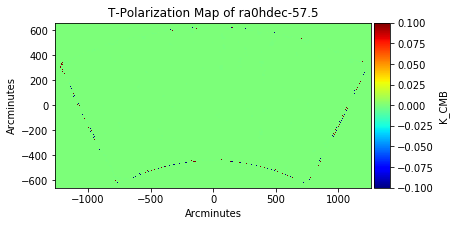